In [ ]:
##Graphing a Line plot

In [15]:
import math 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl

In [3]:
data = {"ecutwfc":[12, 14, 16, 18, 20, 22, 24, 26, 28], 
        "total energy (Ry)":[-15.72103297, -15.73286882, -15.73805663, -15.73997748, -15.74073755, -15.74104964, -15.74118467, -15.74124723, -15.74128342]}
Convergence = pd.DataFrame(data)
display(Convergence)

,ecutwfc,total energy (Ry)
0,12,-15.721033
1,14,-15.732869
2,16,-15.738057
3,18,-15.739977
4,20,-15.740738
5,22,-15.741050
6,24,-15.741185
7,26,-15.741247
8,28,-15.741283


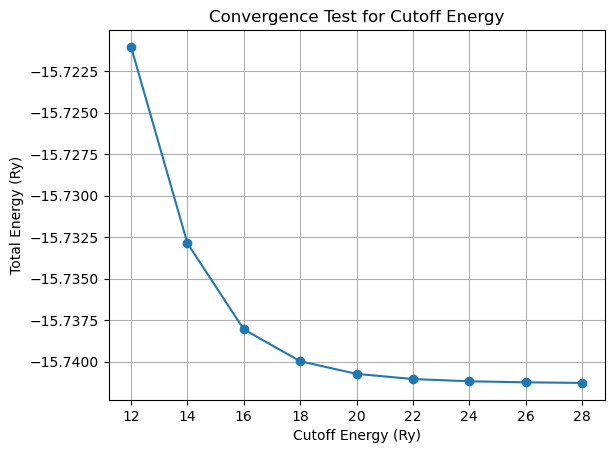

In [7]:
import matplotlib.pyplot as plt

plt.plot(Convergence['ecutwfc'], Convergence['total energy (Ry)'], marker='o')
plt.title('Convergence Test for Cutoff Energy')
plt.xlabel('Cutoff Energy (Ry)')
plt.ylabel('Total Energy (Ry)')
plt.grid(True)
plt.show()

In [ ]:
##Manipulate some aspects of the data before graphing

In [10]:
PTypeZnO_df = pd.DataFrame(np.loadtxt('RbZn2O_dos.dat' ), columns=['E (eV)','dos (E)', 'Int dos (E)'])

In [13]:
#Make a new dataframe with normalized E (eV)

# copy the data
df_PType_scaled = PTypeZnO_df.copy()
  
# apply normalization techniques on Column 1
x = 'E (eV)'
df_PType_scaled[x] = (df_PType_scaled[x] - 6.852) / df_PType_scaled[x].std() 
  
# view normalized data
display(df_PType_scaled)

,E (eV),dos (E),Int dos (E)
0,-1.521803,2.242000e+01,2.242
1,-1.504611,1.015000e+01,3.256
2,-1.487419,1.768000e+00,3.433
3,-1.470228,1.163000e-01,3.445
4,-1.453036,2.792000e-03,3.445
...,...,...,...
196,1.847756,4.453000e-84,699.400
197,1.864947,4.453000e-84,699.400
198,1.882139,4.453000e-84,699.400
199,1.899331,4.453000e-84,699.400


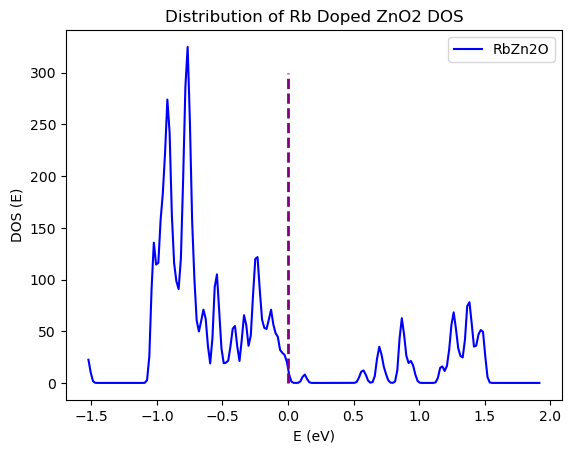

In [51]:
DOS = sns.lineplot(data = df_PType_scaled, x='E (eV)', y = 'dos (E)', color='blue', label='RbZn2O')
plt.title("Distribution of Rb Doped ZnO2 DOS")
plt.xlabel("E (eV)")
plt.ylabel("DOS (E)")

#Our normalized mean
plt.vlines(x=0, ymin=0, ymax=300, colors='purple', ls='--', lw=2, label='Fermi Level = 0 eV')

#Show legend
#plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

#Zoom in 
#plt.axis([-0.1, 0.1, 0, 50])

#In graph textbox
import statistics

mu = 6.852
sigma = statistics.stdev(PTypeZnO_df['E (eV)'])
textstr = '\n'.join((r'$\mu=%.2f$ eV' % (mu, ), r'$\sigma=%.2f$ eV' % (sigma, )))
#DOS.text(0.5, 200, textstr, fontsize=14, verticalalignment='top')